### Import library:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Read the data:

In [2]:
titanic = pd.read_csv("Titanic-Dataset.csv")

## Data Exploring:

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Columns description:

**PassengerId** - passenger unique identifier <br>
**Survived** - if passenger survived (1) or died (0) <br>
**Pclass** - passenger class: 1 (luxury), 2 (middle), 3 (low) <br>
**Name** - passenger name <br>
**Sex** - male or female <br>
**Age** - passenger age (float) <br>
**SibSp** - sum of siblings and spoused traveling with the passenger <br>
**Parch** - sum of parents and children traveling with the passenger <br>
**Ticket** - passenger's ticket number <br>
**Fare** - money spent on the ticket <br>
**Cabin** - cabin category or number assigned to the passenger (if available) <br>
**Embarked** - destination passenger embarked from (S=Southampton, C=Cherbourg, Q=Queenstown) <br>

In [4]:
titanic.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.duplicated().sum()

0

In [7]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Visualisation:

#### Sex distribution of passengers:

In [8]:
sex_counts = titanic["Sex"].value_counts()
sex_counts

male      577
female    314
Name: Sex, dtype: int64

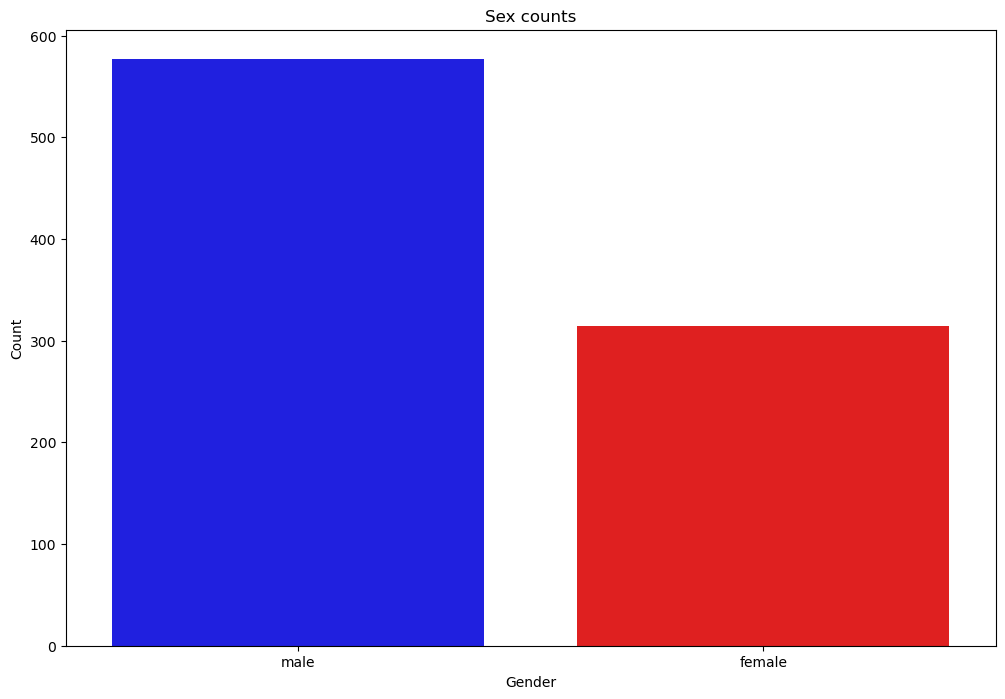

In [9]:
colors = ["blue", "red"]

plt.figure(figsize=(12,8))
sns.barplot(x=sex_counts.index, y=sex_counts.values, palette=colors)
plt.title("Sex counts")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

#### 5 most fequent age values:

In [10]:
#the most 5 age in data
age_counts=titanic["Age"].value_counts().head()
age_counts

24.0    30
22.0    27
18.0    26
19.0    25
28.0    25
Name: Age, dtype: int64

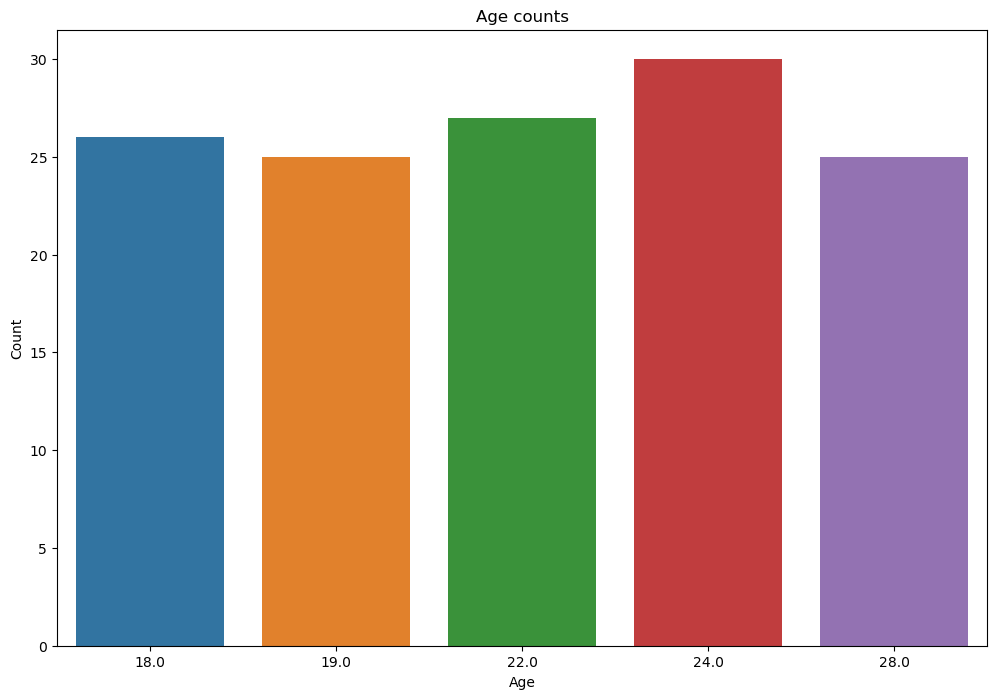

In [11]:
plt.figure(figsize=(12,8))
sns.barplot(x=age_counts.index, y=age_counts.values)
plt.title("Age counts")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

#### Passengers distribution by Pclass:

In [12]:
pclass_counts = titanic["Pclass"].value_counts()
pclass_counts

3    491
1    216
2    184
Name: Pclass, dtype: int64

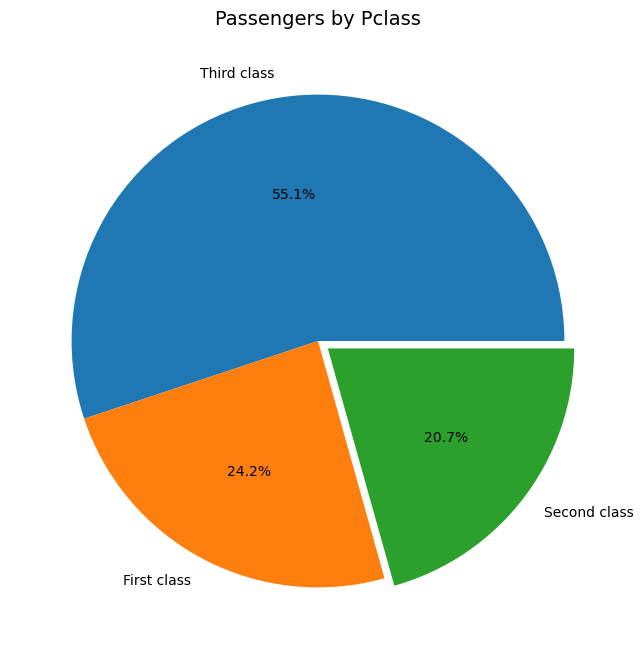

In [13]:
pclass_names = pclass_counts.index.map({1:"First class", 2:"Second class", 3:"Third class"})

plt.figure(figsize = (12,8))
explode = (0,0,0.05)
plt.pie(pclass_counts.values, labels=pclass_names, explode = explode, autopct = "%.1f%%")
plt.title("Passengers by Pclass", fontsize=14)
plt.show()

#### Passengers distribution by Embarked destination:

In [14]:
embarked_counts = titanic["Embarked"].value_counts()
embarked_counts

S    644
C    168
Q     77
Name: Embarked, dtype: int64

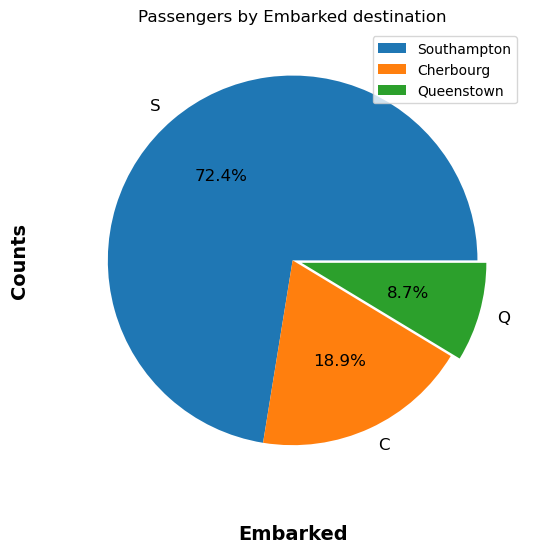

In [15]:
embarked_dict = {'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'}
embarked_long = embarked_counts.index.map(embarked_dict)

plt.figure(figsize = (20, 6))
explode = (0,0,0.05)
embarked_counts.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('Passengers by Embarked destination')
plt.xlabel('Embarked', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('Counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = embarked_long, loc = "best")
plt.show()

#### Passengers by Survival:

In [16]:
survival_counts = titanic["Survived"].value_counts()
survival_counts

0    549
1    342
Name: Survived, dtype: int64

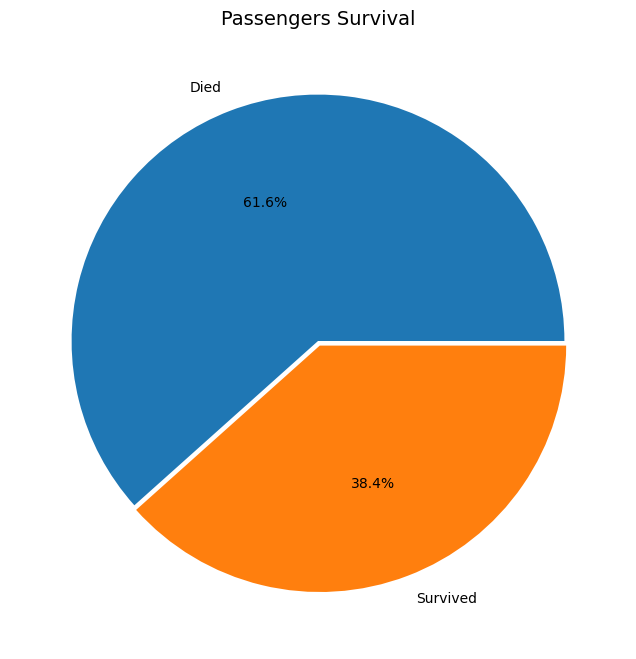

In [17]:
survived_dict = {1:"Survived", 0:"Died"}
survived_long = survival_counts.index.map(survived_dict)

plt.figure(figsize = (12,8))
plt.pie(survival_counts.values, labels=survived_long, explode=(0,0.02), autopct = "%.1f%%")
plt.title("Passengers Survival", fontsize=14)
plt.show()

#### Survival by Age:

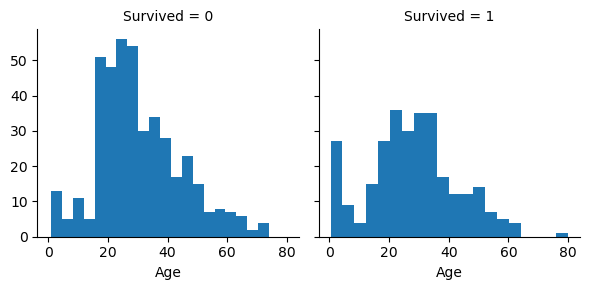

In [18]:
age=sns.FacetGrid(titanic,col='Survived')
age.map(plt.hist,'Age',bins=20)

#### Survival by Gender:

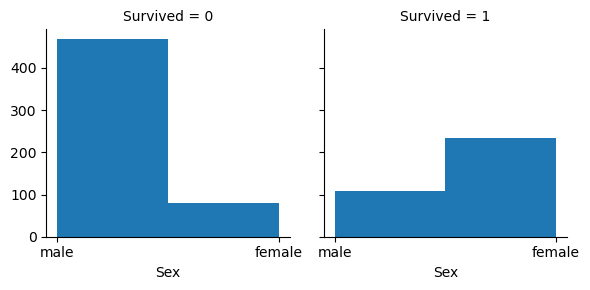

In [19]:
gender=sns.FacetGrid(titanic,col='Survived')

gender.map(plt.hist,'Sex',bins=2)

#### Survival by SibSp:

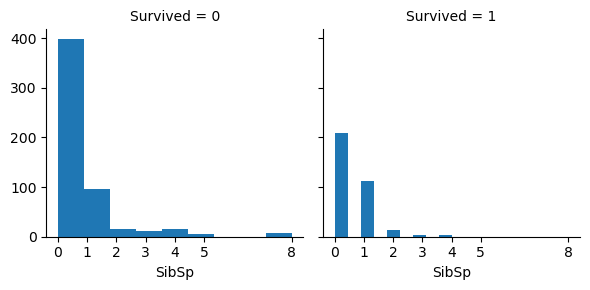

In [20]:
sibsp_counts = titanic["SibSp"].value_counts()

sibsp=sns.FacetGrid(titanic,col='Survived')
plt.xticks(sibsp_counts.index)
sibsp.map(plt.hist,'SibSp',bins=9)

#### Survival by Passenger class:

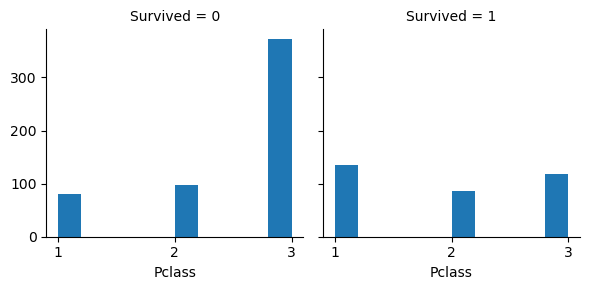

In [21]:
pclass=sns.FacetGrid(titanic,col='Survived')
plt.xticks([1,2,3])
pclass.map(plt.hist,'Pclass')

## Data Preprocessing:

### Drop the columns, which are useless for our prediction:

In [22]:
titanic.drop(["PassengerId","Name", "Cabin", "Ticket"], axis=1, inplace=True)

### Replace the missing values:

In [23]:
titanic["Age"].fillna(titanic["Age"].median(), inplace=True)

In [24]:
titanic["Embarked"].fillna(titanic["Embarked"].mode()[0], inplace=True)

### Convert the text values to numbers:

In [25]:
label_encoder = LabelEncoder()

In [26]:
titanic["Sex"] = label_encoder.fit_transform(titanic["Sex"])
titanic["Embarked"] = label_encoder.fit_transform(titanic["Embarked"])

### Examine correlation between columns:

In [27]:
titanic.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.018754
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.018754,0.068230,0.039798,-0.224719,1.000000


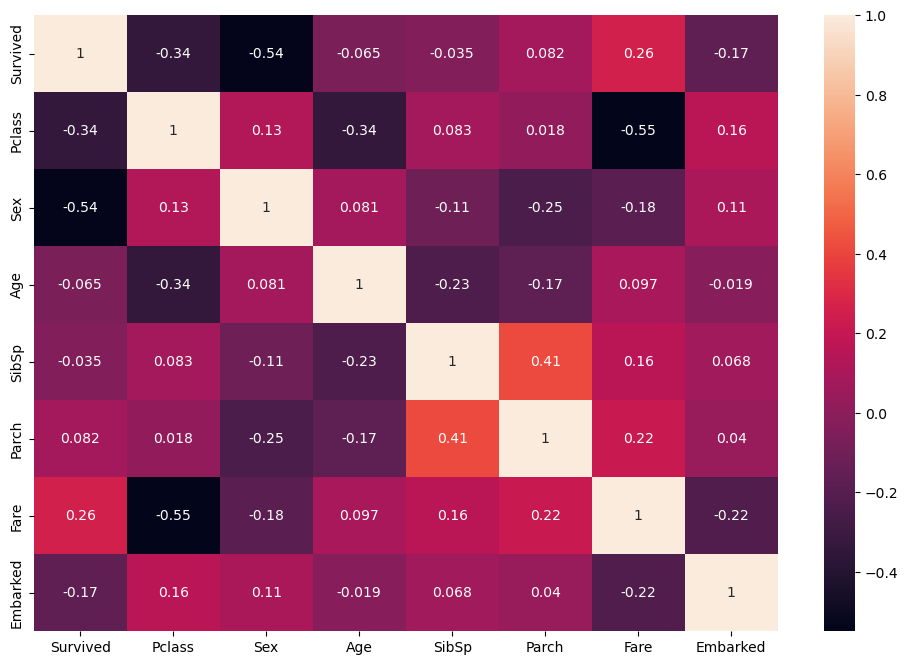

In [28]:
plt.figure(figsize=(12, 8))
sns.heatmap(titanic.corr(), annot=True)
plt.show()

### Split the titanic DF into predictors and values to be predicted:

In [29]:
unscaled_inputs = titanic.drop("Survived", axis=1).copy()
targets = titanic["Survived"]

### Scale the data:

In [30]:
survival_scaler = StandardScaler()

In [31]:
survival_scaler.fit(unscaled_inputs)

StandardScaler()

In [32]:
scaled_inputs = survival_scaler.transform(unscaled_inputs)
scaled_inputs

array([[ 0.82737724,  0.73769513, -0.56573646, ..., -0.47367361,
        -0.50244517,  0.58595414],
       [-1.56610693, -1.35557354,  0.66386103, ..., -0.47367361,
         0.78684529, -1.9423032 ],
       [ 0.82737724, -1.35557354, -0.25833709, ..., -0.47367361,
        -0.48885426,  0.58595414],
       ...,
       [ 0.82737724, -1.35557354, -0.1046374 , ...,  2.00893337,
        -0.17626324,  0.58595414],
       [-1.56610693,  0.73769513, -0.25833709, ..., -0.47367361,
        -0.04438104, -1.9423032 ],
       [ 0.82737724,  0.73769513,  0.20276197, ..., -0.47367361,
        -0.49237783, -0.67817453]])

### Now split the data into training and test data:

In [33]:
X_train, X_test, y_train, y_test = train_test_split(scaled_inputs, targets, test_size=0.2, random_state=42)

In [34]:
print(X_train.shape, y_train.shape)

(712, 7) (712,)


## Modeling:

### Make a prediction using a Logistic Regression model:

In [35]:
model = LogisticRegression()

In [36]:
model.fit(X_train, y_train)

LogisticRegression()

In [37]:
y_pred = model.predict(X_test)

### Check the model accuracy:

In [38]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8044692737430168

### Check the acuracy on the training data as well:

In [39]:
y_pred2 = model.predict(X_train)

In [40]:
accuracy2 = accuracy_score(y_train, y_pred2)
accuracy2

0.800561797752809

## Analysis of the Model:

### Find the Coeffcients (weight of each factor) used in our model:

In [41]:
feature_name = unscaled_inputs.columns.values

In [42]:
summary_table = pd.DataFrame(columns=["Feature name"], data = feature_name)

In [43]:
summary_table["Coefficient"] = np.transpose(model.coef_)
summary_table

,Feature name,Coefficient
0,Pclass,-0.792425
1,Sex,-1.285683
2,Age,-0.395695
3,SibSp,-0.328026
4,Parch,-0.100180
5,Fare,0.121310
6,Embarked,-0.174815


### Add intercept (offset on regression) to the table:

In [44]:
summary_table.index = summary_table.index + 1

In [45]:
summary_table.loc[0] = ['Intercept', model.intercept_[0]]

In [46]:
summary_table.sort_index(inplace=True)
summary_table

,Feature name,Coefficient
0,Intercept,-0.623023
1,Pclass,-0.792425
2,Sex,-1.285683
3,Age,-0.395695
4,SibSp,-0.328026
5,Parch,-0.100180
6,Fare,0.121310
7,Embarked,-0.174815


### Add Odds ratio (chance to survive when value = 1):

In [47]:
summary_table['Odds_ratio'] = np.exp(summary_table.Coefficient)

In [48]:
summary_table.sort_values('Odds_ratio', ascending=False)

,Feature name,Coefficient,Odds_ratio
6,Fare,0.121310,1.128975
5,Parch,-0.100180,0.904675
7,Embarked,-0.174815,0.839612
4,SibSp,-0.328026,0.720344
3,Age,-0.395695,0.673212
0,Intercept,-0.623023,0.536321
1,Pclass,-0.792425,0.452746
2,Sex,-1.285683,0.276462


## Now display the probabilities of predicted value:

### Here we have two values for each row - [probability of result 0, probability of result 1]:

In [49]:
predicted_proba = model.predict_proba(X_test)
predicted_proba

array([[0.89152764, 0.10847236],
       [0.7826072 , 0.2173928 ],
       [0.87000946, 0.12999054],
       [0.10898146, 0.89101854],
       [0.24505898, 0.75494102],
       [0.06430352, 0.93569648],
       [0.31701438, 0.68298562],
       [0.91293892, 0.08706108],
       [0.24371181, 0.75628819],
       [0.07492148, 0.92507852],
       [0.67009849, 0.32990151],
       [0.93280241, 0.06719759],
       [0.60526077, 0.39473923],
       [0.85381808, 0.14618192],
       [0.80641227, 0.19358773],
       [0.05946524, 0.94053476],
       [0.70308027, 0.29691973],
       [0.31697249, 0.68302751],
       [0.76009169, 0.23990831],
       [0.67211746, 0.32788254],
       [0.88316509, 0.11683491],
       [0.5949873 , 0.4050127 ],
       [0.37218748, 0.62781252],
       [0.86964994, 0.13035006],
       [0.8936193 , 0.1063807 ],
       [0.93641974, 0.06358026],
       [0.53052188, 0.46947812],
       [0.78156652, 0.21843348],
       [0.92465241, 0.07534759],
       [0.38803839, 0.61196161],
       [0.

### Show the Array displaying probability of "target = 1" for each row:

In [50]:
predicted_proba[:,1]

array([0.10847236, 0.2173928 , 0.12999054, 0.89101854, 0.75494102,
       0.93569648, 0.68298562, 0.08706108, 0.75628819, 0.92507852,
       0.32990151, 0.06719759, 0.39473923, 0.14618192, 0.19358773,
       0.94053476, 0.29691973, 0.68302751, 0.23990831, 0.32788254,
       0.11683491, 0.4050127 , 0.62781252, 0.13035006, 0.1063807 ,
       0.06358026, 0.46947812, 0.21843348, 0.07534759, 0.61196161,
       0.13346021, 0.67458422, 0.56216086, 0.63321859, 0.13706089,
       0.12416003, 0.45504516, 0.68298562, 0.94690632, 0.10485693,
       0.19494143, 0.07766507, 0.10489229, 0.1274435 , 0.58990729,
       0.08428574, 0.13353438, 0.1203527 , 0.11662191, 0.32974442,
       0.73035401, 0.81769953, 0.03713049, 0.49917636, 0.04526535,
       0.93548679, 0.21226367, 0.9356838 , 0.78824283, 0.73914402,
       0.1265495 , 0.86475397, 0.7758792 , 0.44925196, 0.1274435 ,
       0.65015459, 0.30513692, 0.10203212, 0.14288627, 0.88390711,
       0.76463779, 0.95107129, 0.57665462, 0.90993769, 0.11999